<b>
<p>
<center>
<font size='5'>
DATS 6202 Final Project
</font>
</center>
</p>
<b>
<p>
<center>
<font size='4'>
Digit Recognizer - Training Neural network with MNIST Dataset
</font>
</center>
</p>
<b>
<p>
<center>
<font size='3'>
Group 8 - Xingyu Yang
</font>
</center>
</p>


# Introduction



>   **Introduction to the project**

 - This Project is based on the Kaggle Competition *Digit Recognizer: Learn Computer vision fundamentals with the famous MNIST data*. The training and testing dataset is downloaded from the competition data. The web link directed to the competition is https://www.kaggle.com/competitions/digit-recognizer/overview


> **Project Proposal**

- Among the modeling techniques we've learned, which would be the best to identify the MNIST dataset?

- In this project, with the provided figures of hand written digits from the training dataset, we would like to train a model to accurately indentify the numbers from the figures, select the model that preforms the best by testing it with a validation set, and finally submit the predictions on Kaggle to see which models have higher test scores.

- We use a variation of classification techniques including SVM, MLP Classifier, Dense Neural Network and Convolutional Neural Network.

- This project not only helps us practice machine learning models we've learned in class but also help to understand what model may be better to apply when dealing with computer vision and figure processing in the future.

# Setting up the environment


> **Connect to Colab**

In [ ]:
from google.colab import drive
import sys
import os
# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/final_project'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/spring_2022/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/spring_2022/code/models/p2_shallow_learning/'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/spring_2022/code/utilities/p3_deep_learning/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> **Import warnings**

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

> **Import Matplotlib**


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

> **Import TensorFlow**

In [ ]:
%tensorflow_version 2.x
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras

> **Set Random seed**

In [ ]:
# The random seed
random_seed = 20

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/spring_2022/code/utilities/p3_deep_learning


> **Loading data**

Read the train test data  from the colab folder and separate the independent variables (pixels from the figure) and the target value (label).

In [ ]:
import pandas as pd
train_df=pd.read_csv(abspath_curr + '/data/train.csv',header=0)
test_df=pd.read_csv(abspath_curr + '/data/test.csv',header=0)
x_train_df=train_df.drop(columns='label')
y_train_df=train_df['label']
x_test_df=test_df


> **Inspecting the data**

Let's take a look at the first 5 rows of training dataset. As we can see, the first column is the label, and the remaining columns are the value in each pixel.

In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Print the first 5 rows of testing dataset: Since we are predicting label with the testing data, it does not contains a label column

In [ ]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The code below prints the shape of training data without the target column, as well as the shape of testing data. We can see that there are total 784 pixel in a figure, maning that the figure has a shape of 28*28

In [ ]:
print(x_train_df.shape,x_test_df.shape)

(42000, 784) (28000, 784)


> **Visualization the data**

We randomly selected a few figures from the training data to see how they look like.

Plot of the first image from the training dataset:

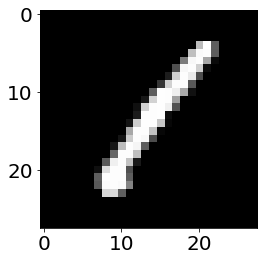

In [ ]:
plt.imshow(x_train_df.iloc[0].values.reshape(28,28),cmap=plt.get_cmap('gray'))

Plot of the 121th image from the training data:

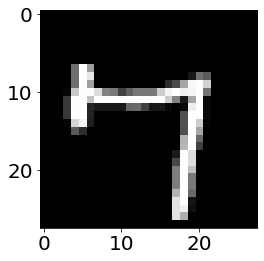

In [ ]:
plt.imshow(x_train_df.iloc[120].values.reshape(28,28),cmap=plt.get_cmap('gray'))

Plot of the 301th image from the trainign data:

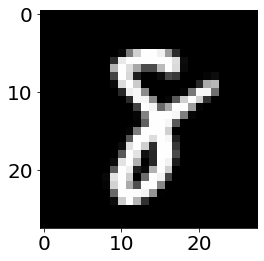

In [ ]:
plt.imshow(x_train_df.iloc[300].values.reshape(28,28),cmap=plt.get_cmap('gray'))

> **Split the data**

Here we split the original training data into a new training data and a validation data, with a ratio of 0.75:0.25 by the function train_test_split from sklearn. As we mentioned in the proposal, we are going to train models with this new training data and test the model performance by the validation set.

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

train, val=train_test_split(train_df, train_size=0.75,random_state=random_seed)
val=val.reset_index(drop=True)
train=train.reset_index(drop=True)
train_arr=train.values
val_arr=val.values
x_train=train.drop(columns='label')
x_train_arr=x_train.values.reshape(-1,28,28)
x_val=val.drop(columns='label')
x_val_arr=x_val.values.reshape(-1,28,28)
y_train=train['label']
y_val=val['label']


We now plot a histogram of labels in our training data to see if the data are evenly distributed among all 10 labels so that the model we fit will not be highly biased. By looking at the histogram, our data is pretty balanced.

Text(0.5, 1.0, 'Distribution of label from 0 to 9')

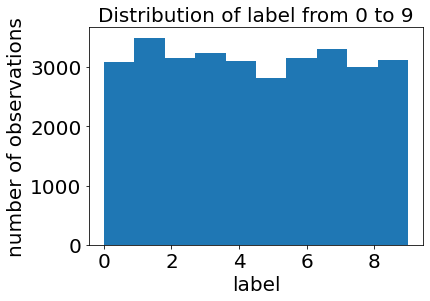

In [ ]:
plt.hist(y_train)
plt.xlabel('label')
plt.ylabel('number of observations')
plt.title('Distribution of label from 0 to 9')

# Support Vector Machines

> **Make a directory for SVM**

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/SVM_model/')
if not os.path.exists(directory):
    os.makedirs(directory)

> **Fit a SVM model**

In [ ]:
from sklearn import svm
svc=svm.SVC(C=10, kernel='rbf',gamma='scale',random_state=random_seed)
svc.fit(x_train.values,y_train)
svc_pred=svc.predict(x_val.values)

Among all the hyperparameters tuned, the svc model with C=10, kernel = 'rbf' and gamma = 'scale' has the highest score, so I decide to fit the test data with this model

> **Calculate the score**

In [ ]:
svc.score(x_val.values,y_val)

0.9808571428571429

>  **Print the dataframe with miss-predicted labels**

In [ ]:
result_svc=pd.DataFrame({'True value':y_val,'Predicted value':svc_pred})
svc_error_df=result_svc[result_svc['True value']!=result_svc['Predicted value']]
svc_error_df

,True value,Predicted value
28,3,2
60,9,5
71,4,7
152,9,7
187,7,3
...,...,...
10066,3,5
10094,2,0
10281,7,4
10340,8,1


The dataframe has 201 rows, meaning that we have miss predicted 201 labels in the validation set.

> **plot the miss-predicted images**

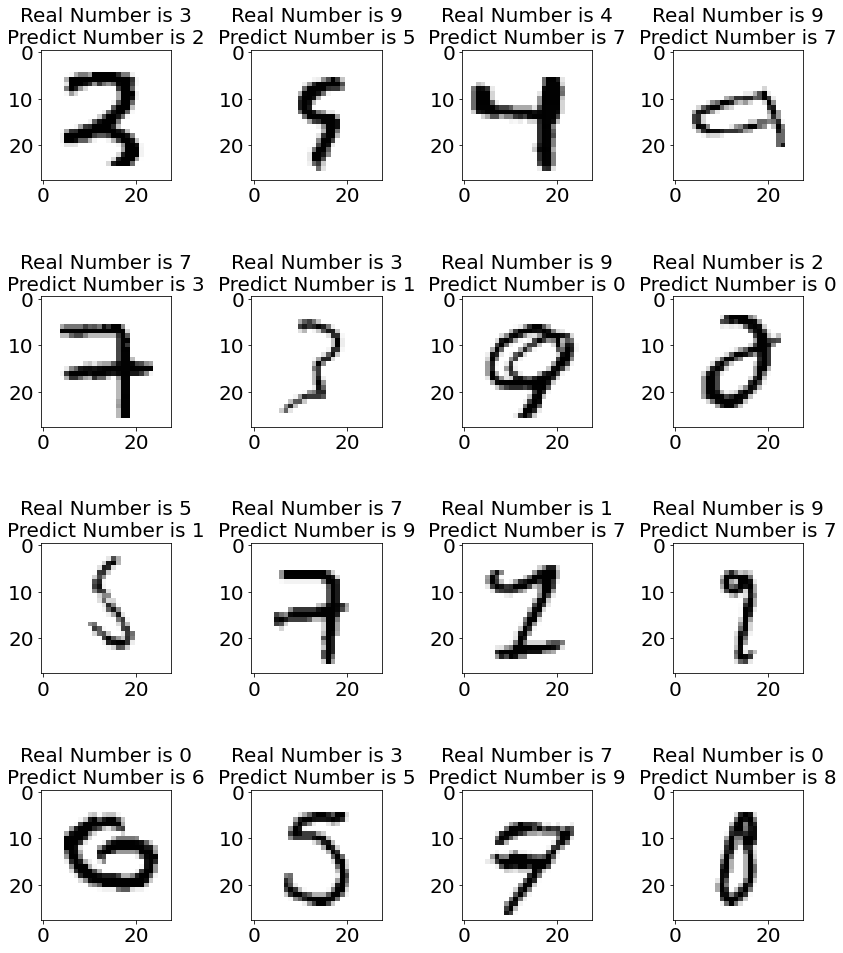

In [ ]:
x_svc_val_err_df=x_val.iloc[list(svc_error_df.index)]

svc_error_df=svc_error_df.reset_index(drop=True)
x_svc_val_err_df=x_svc_val_err_df.reset_index(drop=True)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_svc_val_err_df.values.reshape(-1,28,28)[i], cmap='binary')
    ax.set(title = f"Real Number is {svc_error_df['True value'][i]}\nPredict Number is {svc_error_df['Predicted value'][i]}");
plt.tight_layout()

> **Generateing submission csv**

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/SVM_model/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

svc_pred_test=svc.predict(x_test_df.values)

# Get the submission dataframe
svc_submit = pd.DataFrame({"ImageId":np.arange(1,28001),"Label":svc_pred_test})

# Generate the submission file
svc_submit.to_csv(abspath_curr + '/result/SVM_model/submission/submission.csv', index=False)

#MLP Classifier

> **Make a directory for the model**

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/MLP_model/')
if not os.path.exists(directory):
    os.makedirs(directory)

> **Fit the MLPClassifier model**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(random_state=random_seed, max_iter=5000,activation='relu').fit(x_train,y_train)
mlp.score(x_val,y_val)


0.9620952380952381

> **Print the datafram with miss-predicted labels**

In [ ]:
result_mlp=pd.DataFrame({'True value':y_val,'Predicted value':mlp.predict(x_val)})
mlp_error_df=result_mlp[result_mlp['True value']!=result_mlp['Predicted value']]
mlp_error_df

,True value,Predicted value
13,0,8
28,3,2
51,8,3
60,9,5
152,9,4
...,...,...
10383,8,3
10425,1,4
10439,8,9
10464,2,7


We have miss predicted 398 rows from the validation set

> **Plot the miss-predicted images**

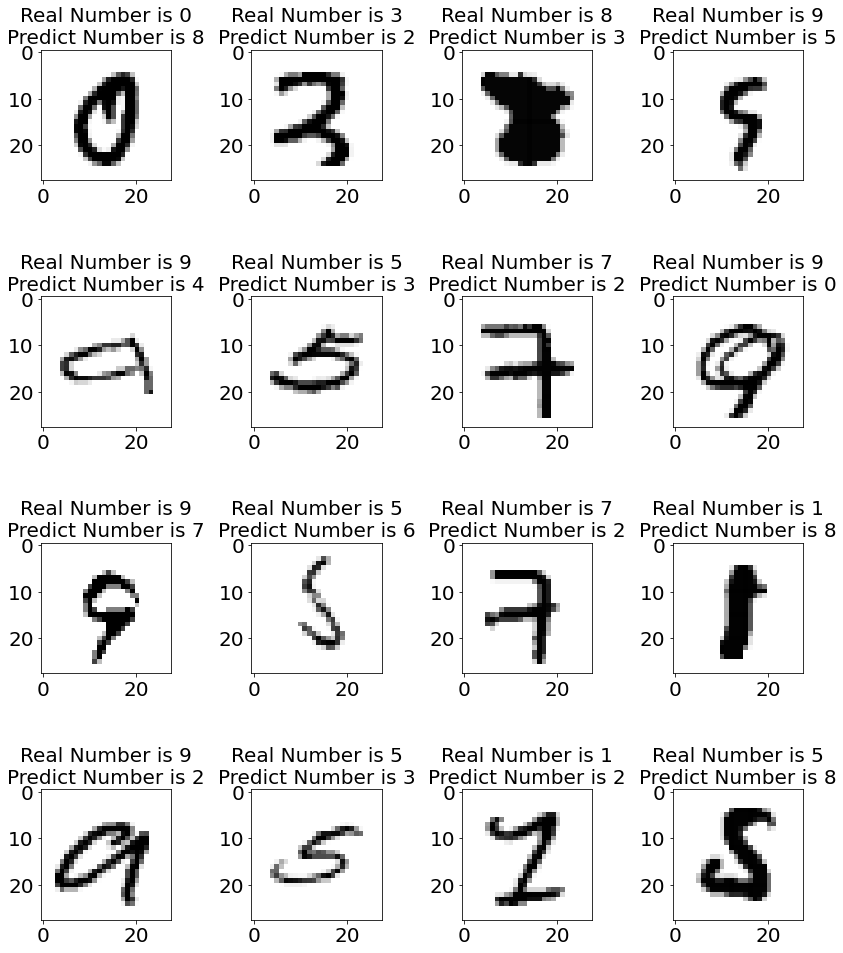

In [ ]:
x_mlp_val_err_df=x_val.iloc[list(mlp_error_df.index)]

mlp_error_df=mlp_error_df.reset_index(drop=True)
x_mlp_val_err_df=x_mlp_val_err_df.reset_index(drop=True)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_mlp_val_err_df.values.reshape(-1,28,28)[i], cmap='binary')
    ax.set(title = f"Real Number is {mlp_error_df['True value'][i]}\nPredict Number is {mlp_error_df['Predicted value'][i]}");
plt.tight_layout()

> **Generate submission file**

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/MLP_model/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

mlp_pred_test=mlp.predict(x_test_df)

# Get the submission dataframe
mlp_submit = pd.DataFrame({"ImageId":np.arange(1,28001),"Label":mlp_pred_test})

# Generate the submission file
mlp_submit.to_csv(abspath_curr + '/result/MLP_model/submission/submission.csv', index=False)

#Dense Neural Network


> **Creating the directory for the saved model**

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/dnn1_model/')
if not os.path.exists(directory):
    os.makedirs(directory)

> **Building the model**

In [ ]:
# A sequential dnn
model = keras.models.Sequential()

# Add the input layer
model.add(keras.layers.Flatten(input_shape=[28,28,1]))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the first hidden layer
model.add(keras.layers.Dense(50, activation='relu'))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the second hidden layer
model.add(keras.layers.Dense(75, activation='tanh'))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the third hidden layer
model.add(keras.layers.Dense(50, activation='relu'))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the fourth hidden layer
model.add(keras.layers.Dense(100, activation='tanh'))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the fifth hidden layer
model.add(keras.layers.Dense(50, activation='relu'))
# Add bn layer
model.add(keras.layers.BatchNormalization())


# Add the output layer

model.add(keras.layers.Dense(10, activation='softmax'))

# The model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 75)                3825      
                                                                 
 batch_normalization_2 (Batc  (None, 75)               3

> **Compiling the model**

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

> **Setting callbacks**

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/dnn1_model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(
    factor=0.1,
    patience=5)

> **Training, evaluating and saving the best model**

In [ ]:
# Train, evaluate and save the best model
history = model.fit(x_train_arr,y_train,
                    batch_size=20,
                    epochs=20,
                    validation_data=(x_val_arr,y_val),
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/20
1575/1575 [==============================] - 12s 6ms/step - loss: 0.4909 - accuracy: 0.8487 - val_loss: 0.2460 - val_accuracy: 0.9281 - lr: 0.0010
Epoch 2/20
1575/1575 [==============================] - 9s 5ms/step - loss: 0.2771 - accuracy: 0.9150 - val_loss: 0.2184 - val_accuracy: 0.9403 - lr: 0.0010
Epoch 3/20
1575/1575 [==============================] - 9s 6ms/step - loss: 0.2319 - accuracy: 0.9293 - val_loss: 0.2166 - val_accuracy: 0.9408 - lr: 0.0010
Epoch 4/20
1575/1575 [==============================] - 8s 5ms/step - loss: 0.2025 - accuracy: 0.9368 - val_loss: 0.1929 - val_accuracy: 0.9468 - lr: 0.0010
Epoch 5/20
1575/1575 [==============================] - 8s 5ms/step - loss: 0.1809 - accuracy: 0.9433 - val_loss: 0.1770 - val_accuracy: 0.9530 - lr: 0.0010
Epoch 6/20
1575/1575 [==============================] - 9s 6ms/step - loss: 0.1607 - accuracy: 0.9494 - val_loss: 0.1798 - val_accuracy: 0.9547 - lr: 0.0010
Epoch 7/20
1575/1575 [==============================] - 9

The DNN runs for 12 epoch, with the 7th model being the best, it finally provides an accuracy of 0.9559.

In [ ]:
model.evaluate(x_val_arr,y_val)

329/329 [==============================] - 1s 3ms/step - loss: 0.1742 - accuracy: 0.9559


[0.17420229315757751, 0.9559047818183899]

> **Generate Prediction**

In [ ]:
sequential_pred = model.predict(x_val_arr)
sequential_pred = np.argmax(sequential_pred,1)
sequential_pred

array([2, 6, 4, ..., 4, 4, 2])

> **Print the dataframe with miss-predicted labels**

In [ ]:
result_sequential=pd.DataFrame({'True value':y_val,'Predicted value':sequential_pred})
sequential_error_df=result_sequential[result_sequential['True value']!=result_sequential['Predicted value']]
sequential_error_df
#result_mlp

,True value,Predicted value
28,3,2
60,9,5
71,4,7
89,8,6
110,9,1
...,...,...
10366,6,5
10413,0,6
10425,1,4
10428,5,6


We have miss predicted 463 labels, we is not surprisingly more than SVC and MLP since our validation accuracy is lower for this model.

> **Plot the miss-predicted images**

In [ ]:
x_seq_val_err_df=x_val.iloc[list(sequential_error_df.index)]


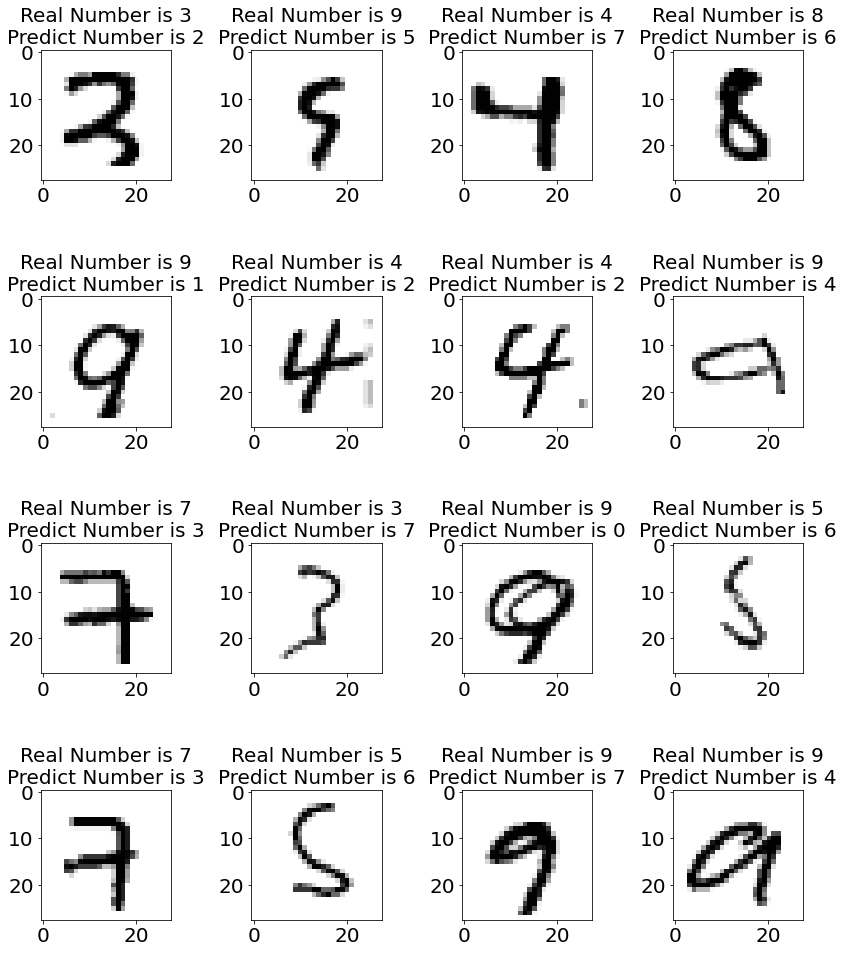

In [ ]:

sequential_error_df=sequential_error_df.reset_index(drop=True)
x_seq_val_err_df=x_seq_val_err_df.reset_index(drop=True)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_seq_val_err_df.values.reshape(-1,28,28)[i], cmap='binary')
    ax.set(title = f"Real Number is {sequential_error_df['True value'][i]}\nPredict Number is {sequential_error_df['Predicted value'][i]}");
plt.tight_layout()

> **Creating the directory for the figure**

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/dnn1_figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

> **Plot the learning curves**

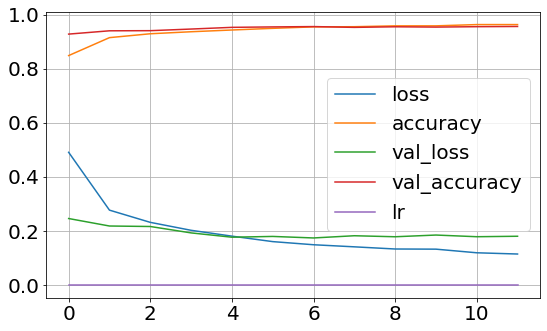

In [ ]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/dnn1_figure/learning_curve.pdf')
plt.show()

Throughout the training process, both the training accuracy and the validation continuous increase, while both loss are decreasing which means that we did not overfit the data. The learning curve proves that out training process went well.

> **Generating submission file**

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/dnn1_model/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)


dnn1_pred_test = model.predict(x_test_df.values.reshape(-1,28,28))
dnn1_pred_test = np.argmax(dnn1_pred_test,1)
# Get the submission dataframe
dnn1_submit = pd.DataFrame({"ImageId":np.arange(1,28001),"Label":dnn1_pred_test})

# Generate the submission file
dnn1_submit.to_csv(abspath_curr + '/result/dnn1_model/submission/submission.csv', index=False)

#CNN Network

> **Make a directory for the model**

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/cnn1_model/')
if not os.path.exists(directory):
    os.makedirs(directory)

> **Build the model**

In [ ]:

model=keras.models.Sequential()


model.add(keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                      

> **Setting callbacks**

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/cnn1_model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=5)

> **Compiling the model**

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

> **Training and evaluating the model**

In [ ]:
# Train, evaluate and save the best model
history = model.fit(x_train_arr,y_train,
                    batch_size=20,
                    epochs=20,
                    validation_data=(x_val_arr,y_val),
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/20
1575/1575 [==============================] - 120s 75ms/step - loss: 0.3574 - accuracy: 0.9171 - val_loss: 0.1469 - val_accuracy: 0.9652 - lr: 0.0100
Epoch 2/20
1575/1575 [==============================] - 124s 79ms/step - loss: 0.1748 - accuracy: 0.9546 - val_loss: 0.1211 - val_accuracy: 0.9722 - lr: 0.0100
Epoch 3/20
1575/1575 [==============================] - 118s 75ms/step - loss: 0.1439 - accuracy: 0.9617 - val_loss: 0.1266 - val_accuracy: 0.9679 - lr: 0.0100
Epoch 4/20
1575/1575 [==============================] - 116s 73ms/step - loss: 0.1411 - accuracy: 0.9640 - val_loss: 0.1284 - val_accuracy: 0.9695 - lr: 0.0100


In [ ]:
model.evaluate(x_val_arr,y_val)

329/329 [==============================] - 8s 24ms/step - loss: 0.1211 - accuracy: 0.9722


[0.12110534310340881, 0.9721904993057251]

> **Generate prediction**

In [ ]:
cnn1_pred = model.predict(x_val_arr)
cnn1_pred = np.argmax(cnn1_pred,1)
cnn1_pred

array([2, 6, 4, ..., 4, 4, 2])

> **Print the dataframe of miss-predicted labels**

In [ ]:
result_cnn1=pd.DataFrame({'True value':y_val,'Predicted value':cnn1_pred})
cnn1_error_df=result_cnn1[result_cnn1['True value']!=result_cnn1['Predicted value']]
cnn1_error_df

,True value,Predicted value
28,3,2
37,4,9
51,8,0
60,9,5
71,4,7
...,...,...
10094,2,4
10165,2,4
10279,5,6
10323,7,2


> **Plot the miss-predicted images**

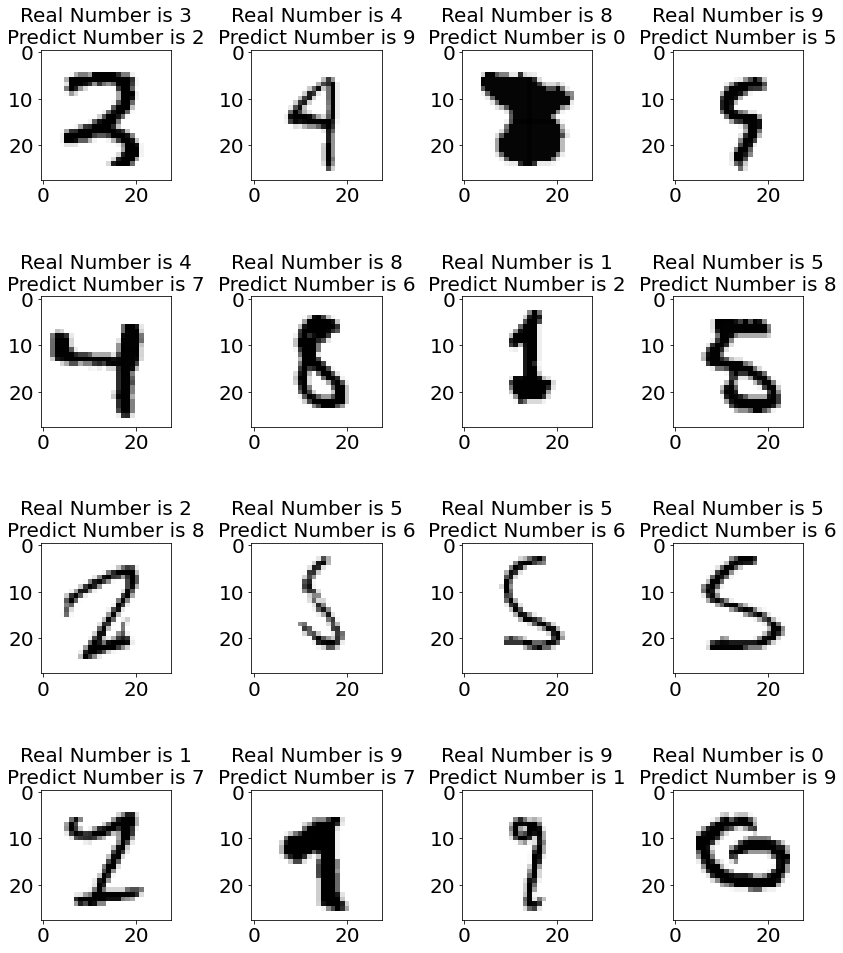

In [ ]:
x_cnn1_val_err_df=x_val.iloc[list(cnn1_error_df.index)]
cnn1_error_df=cnn1_error_df.reset_index(drop=True)
x_cnn1_val_err_df=x_cnn1_val_err_df.reset_index(drop=True)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_cnn1_val_err_df.values.reshape(-1,28,28)[i], cmap='binary')
    ax.set(title = f"Real Number is {cnn1_error_df['True value'][i]}\nPredict Number is {cnn1_error_df['Predicted value'][i]}");
plt.tight_layout()

> **Creating the directory for the figure**

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/cnn1_figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

> **Plot the learning curve**

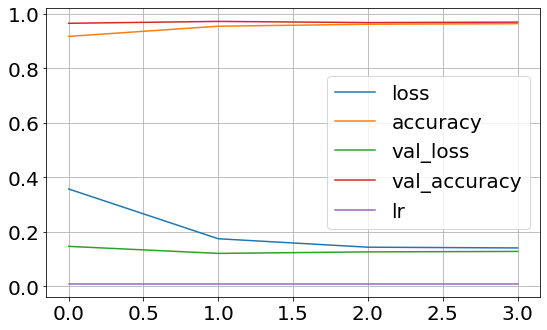

In [ ]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/cnn1_figure/learning_curve.pdf')

Throughout the training process, the training accuracy  continuous increase, but the validation accuracy stays the same, meaning that we may overfit the data.  

> **Generating submission file**

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/cnn1_model/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)


cnn1_pred_test = model.predict(x_test_df.values.reshape(-1,28,28))
cnn1_pred_test = np.argmax(cnn1_pred_test,1)
# Get the submission dataframe
cnn1_submit = pd.DataFrame({"ImageId":np.arange(1,28001),"Label":cnn1_pred_test})

# Generate the submission file
cnn1_submit.to_csv(abspath_curr + '/result/cnn1_model/submission/submission.csv', index=False)

#Conclusion

- By simply looking at the validation accuracy, SVM performs the best with an accuracy of 0.9809, followed by CNN with a accuracy of 0.9721, while MLP Classifier has a accuracy of 0.9621. The DNN model I built performs the worst with an accuracy of 0.9559.

- Further improvement
  - The accuracy for all four models are pretty closed, and relavantly high, meaning that our models can predict the true digit correctly at most time. However, we can further improve our prediction by creating deeper CNN by adding more layers and tuning the activation functions.